In [1]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.mobilenet_v2 import MobileNetV2

In [2]:
pre_trained_model = MobileNetV2(weights='imagenet',
                    include_top=False,
                    input_shape=(224, 224, 3))

#for layer in pre_trained_model.layers:
#    layer.trainable = False
pre_trained_model.trainable = False    
#pre_trained_model.summary()

#last_layer = pre_trained_model.get_layer('block_8_add')
#print('last layer output shape: ', last_layer.output_shape)
#last_output = last_layer.output

In [3]:


x = tf.keras.layers.GlobalAveragePooling2D()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = Dense(64, activation='relu', kernel_regularizer = tf.keras.regularizers.L2(0.001))(x)
#x = Dropout(0.2)(x)
x = Dense(64, activation='relu', kernel_regularizer = tf.keras.regularizers.L2(0.001))(x)
#x = Dropout(0.2)(x)
x = Dense(1024, activation='relu', kernel_regularizer = tf.keras.regularizers.L2(0.001))(x)
# Add a dropout rate of 0.2
x = Dropout(0.4)(x)
x = Dense(512, activation='relu', kernel_regularizer = tf.keras.regularizers.L2(0.001))(x)
# Add a dropout rate of 0.4
x = Dropout(0.4)(x)
# Add a final sigmoid layer for classification
x = Dense(3, activation='softmax')(x)

model = Model(pre_trained_model.input,x)
#RMSprop(learning_rate=0.0001)
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy',tf.keras.metrics.AUC(multi_label=True)])


In [4]:
# Define our example directories and files
base_dir = './dataset/cats_dogs_humans_filtered/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
# Directory with our training human pictures
train_humans_dir = os.path.join(train_dir, 'humans')
# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# Directory with our validation human pictures
validation_humans_dir = os.path.join(validation_dir, 'humans')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)
train_human_fnames = os.listdir(train_humans_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255.,                                   
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1.0/255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    shuffle=False,                                                    
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(224, 224),
                                                    color_mode = 'rgb')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        shuffle=False,
                                                        batch_size=20,
                                                        class_mode='categorical',
                                                        target_size=(224, 224),
                                                        color_mode = 'rgb')

Found 3000 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


Run in command prompt : python -m tensorboard.main --logdir logs/fit --port=6006
Run in colab : %tensorboard --logdir logs/fit --port=6006

In [5]:
#tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [6]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=20,
    epochs=40,
    validation_steps=20,
    verbose=2,
    callbacks=[tensorboard_callback])

Epoch 1/40
20/20 - 27s - loss: 2.1252 - accuracy: 0.3200 - auc: 0.3816 - val_loss: 2.2124 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - 27s/epoch - 1s/step
Epoch 2/40
20/20 - 20s - loss: 1.9398 - accuracy: 0.5950 - auc: 0.6849 - val_loss: 2.2187 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - 20s/epoch - 976ms/step
Epoch 3/40
20/20 - 19s - loss: 1.7818 - accuracy: 0.6400 - auc: 0.8791 - val_loss: 1.8954 - val_accuracy: 0.7175 - val_auc: 0.0000e+00 - 19s/epoch - 967ms/step
Epoch 4/40
20/20 - 21s - loss: 1.6200 - accuracy: 0.7475 - auc: 0.9142 - val_loss: 1.3840 - val_accuracy: 0.9975 - val_auc: 0.0000e+00 - 21s/epoch - 1s/step
Epoch 5/40
20/20 - 21s - loss: 1.4259 - accuracy: 0.8375 - auc: 0.9393 - val_loss: 1.3929 - val_accuracy: 0.9025 - val_auc: 0.0000e+00 - 21s/epoch - 1s/step
Epoch 6/40
20/20 - 20s - loss: 1.1988 - accuracy: 0.9100 - auc: 0.9865 - val_loss: 1.0159 - val_accuracy: 0.9950 - val_auc: 0.0000e+00 - 20s/epoch - 985ms/step
Epoch 7/40
20/20 - 19s - loss: 1.2168 - a

[[0.43118885 0.5650333  0.00377786]]


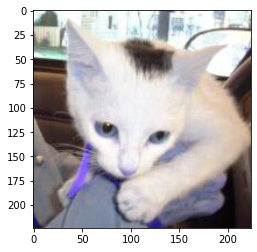

In [8]:
import cv2 as cv
import numpy as np
model.save("models/model.h5")
test_img = cv.imread('./dataset/cats_dogs_humans_filtered/validation/cats/cat.3004.jpg')
array = np.array(cv.resize(test_img,(224,224)))
#print(array) #should be normalised
plt.imshow(cv.resize(test_img,(224,224)))
dim = np.expand_dims(array,axis= 0)
predict = model.predict(dim)
print(predict)


In [9]:
print(array)

[[[255 248 249]
  [255 248 248]
  [251 245 243]
  ...
  [237 252 247]
  [244 253 251]
  [243 248 246]]

 [[255 250 251]
  [255 250 250]
  [254 252 251]
  ...
  [229 246 239]
  [240 252 247]
  [238 243 241]]

 [[255 252 254]
  [254 249 250]
  [255 253 252]
  ...
  [228 243 236]
  [238 249 244]
  [238 243 241]]

 ...

 [[ 25  17  94]
  [ 26  19  94]
  [ 26  20  95]
  ...
  [ 28  21  24]
  [ 29  22  25]
  [ 31  23  24]]

 [[ 27  19  96]
  [ 28  20  96]
  [ 26  20  95]
  ...
  [ 28  21  24]
  [ 29  22  25]
  [ 31  23  24]]

 [[ 28  20  97]
  [ 28  21  96]
  [ 25  19  95]
  ...
  [ 28  21  24]
  [ 29  22  25]
  [ 30  22  23]]]


[[0.99677306 0.00114086 0.00208608]]


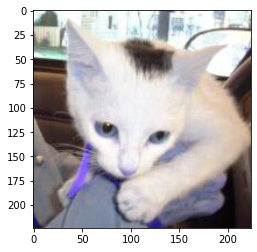

In [10]:
array = array.astype('float64')
array= (array - np.min(array)) / (np.max(array) - np.min(array))
plt.imshow(cv.resize(test_img,(224,224)))
dim = np.expand_dims(array,axis= 0)
predict = model.predict(dim)
print(predict)

In [30]:
print(array)

[[[0.00784314 0.1254902  0.45098039]
  [0.01960784 0.1254902  0.43137255]
  [0.02745098 0.11764706 0.39607843]
  ...
  [0.03137255 0.28627451 0.69411765]
  [0.03921569 0.30980392 0.72941176]
  [0.04313725 0.3254902  0.74901961]]

 [[0.00784314 0.12156863 0.44313725]
  [0.01176471 0.11764706 0.42352941]
  [0.03529412 0.12156863 0.4       ]
  ...
  [0.03137255 0.28627451 0.69411765]
  [0.03921569 0.30980392 0.72941176]
  [0.04705882 0.32941176 0.75294118]]

 [[0.02352941 0.13333333 0.44705882]
  [0.02352941 0.12941176 0.42745098]
  [0.05098039 0.1372549  0.40392157]
  ...
  [0.03137255 0.28627451 0.69411765]
  [0.03921569 0.31372549 0.73333333]
  [0.04705882 0.33333333 0.75686275]]

 ...

 [[0.01176471 0.         0.00784314]
  [0.01176471 0.00392157 0.00784314]
  [0.01568627 0.00392157 0.00784314]
  ...
  [0.05490196 0.07058824 0.09803922]
  [0.04705882 0.06666667 0.08627451]
  [0.03529412 0.0627451  0.07843137]]

 [[0.01176471 0.         0.00784314]
  [0.01176471 0.         0.00784314]


In [11]:
label_map = (train_generator.class_indices)
print(label_map)

{'cats': 0, 'dogs': 1, 'humans': 2}
